In [1]:
import digits_model
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
import keras.utils
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
from keras import backend
import cv2 as cv
%matplotlib inline

(89, 415, 3)
(356, 2075, 3)


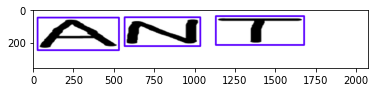

In [13]:
image = cv.imread('ant.png')
height, width, depth = image.shape
print(image.shape)

image = cv.resize(image, dsize=(width*5, height*4), interpolation=cv.INTER_CUBIC)
print(image.shape)

gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)
#plt.imshow(thresh)
kernel = np.ones((5,5), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
#plt.imshow(img_dilation)
gsblur=cv.GaussianBlur(img_dilation,(5,5),0)
#plt.imshow(gsblur)

ctrs, hier = cv.findContours(gsblur.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv.boundingRect(ctr)
    cv.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
plt.imshow(dp)

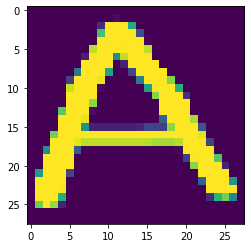

1


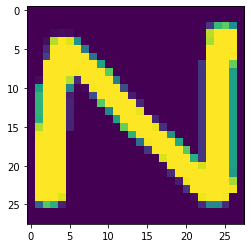

14


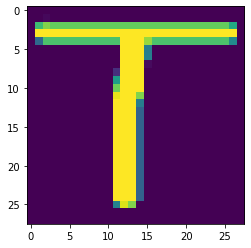

20
Predicted String:ant


In [3]:
model = tf.keras.models.load_model('digits_model')
characters = '0abcdefghijklmnopqrstuvwxyz'
prediction = list()
predicted_word = ''

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv.resize(roi, dsize=(28,28), interpolation=cv.INTER_CUBIC)
    roi = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
    roi = cv.bitwise_not(roi)
    plt.imshow(roi)
    plt.show()
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict(t)
    pred = np.argmax(pred)
    print(pred)
    prediction.append(pred)
    predicted_word += characters[pred]

print(f'Predicted String:{predicted_word}')

[[0.0000000e+00 9.9897361e-01 7.4646539e-07 2.3457782e-25 9.3038967e-16
  9.4297723e-17 3.7691261e-10 5.2557549e-08 2.9867017e-04 8.5504657e-19
  0.0000000e+00 2.1205493e-05 1.0229088e-24 5.2191385e-06 5.8474993e-06
  0.0000000e+00 1.4717380e-10 2.6121137e-07 6.9370744e-04 1.0070551e-14
  1.8479051e-12 7.9525731e-18 0.0000000e+00 5.3967173e-14 6.0742326e-07
  3.6467743e-12 3.5573088e-22]]
prediction: a
[[0.0000000e+00 5.2395996e-02 2.5610179e-01 4.4901590e-03 1.9504566e-01
  6.2701665e-02 9.0488698e-03 1.5136847e-02 1.2920436e-02 2.8708500e-03
  3.2272104e-02 3.7149187e-02 2.4088468e-02 5.2904147e-06 1.5300410e-02
  2.3580287e-05 1.1078092e-05 1.0811790e-02 6.5123350e-03 6.9313594e-03
  6.4740861e-03 5.0319731e-03 3.5665234e-08 7.0300791e-04 1.0581825e-01
  2.2294081e-03 1.3592543e-01]]
prediction: b
[[0.00000000e+00 4.65757324e-07 1.86569541e-05 9.97150838e-01
  4.97823684e-08 1.48199103e-03 2.96361577e-07 2.60049251e-06
  1.15458065e-09 7.62103269e-09 9.56829194e-09 2.14807301e-06
  

[[0.0000000e+00 7.8914842e-13 1.2534360e-10 1.8845819e-11 2.6348614e-06
  1.5183052e-13 8.6558174e-09 1.3855330e-11 1.1690477e-06 7.7550339e-08
  3.3985941e-09 5.8299593e-05 6.3322872e-08 2.0886327e-12 2.9573235e-07
  0.0000000e+00 9.8760627e-23 1.8867119e-10 9.7955526e-06 1.8673249e-11
  3.6473573e-08 2.3097238e-12 4.2016975e-07 5.7720282e-08 9.9992239e-01
  4.7608451e-06 9.3373984e-09]]
prediction: x
[[0.0000000e+00 4.7440274e-08 3.3217908e-08 4.7234515e-19 8.4712380e-04
  4.7845983e-13 2.1544213e-03 4.5059216e-05 3.3621656e-04 1.8683706e-03
  1.3666624e-03 6.8438484e-04 9.9614123e-04 1.2972096e-08 9.1043818e-05
  3.8149846e-25 2.7142314e-03 3.2063227e-04 2.3943393e-02 1.0463680e-06
  1.9406268e-02 4.2171061e-07 8.7247333e-03 5.5322147e-08 6.7497161e-03
  9.2974979e-01 2.6333461e-07]]
prediction: y
[[0.0000000e+00 9.3992865e-03 2.4545455e-02 3.2112650e-03 1.7749713e-03
  8.2752801e-02 2.7379388e-01 8.4427530e-03 3.2331857e-03 6.5514579e-02
  5.8553066e-02 1.8110448e-02 2.7494995e-02 

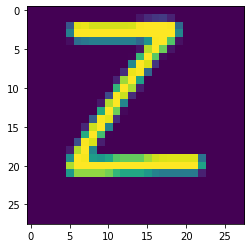

In [46]:
english_letters = '0abcdefghijklmnopqrstuvwxyz'
prediction_list = list()
for i in range(26):
    img = cv.imread(f'/home/swopnil/PycharmProjects/HandwritingRecognition/src/{i+1}.png')[:,:,0]
    plt.imshow(img)
    plt.show
    prediction = model.predict(img.reshape(1, 784))
    print(prediction)
    print(f'prediction: {english_letters[np.argmax(prediction)]}')
    if english_letters[np.argmax(prediction)] == english_letters[i + 1]:
        prediction_list.append(1)
    else:
        prediction_list.append(0)
print(prediction_list)
print(sum(prediction_list))
accuracy = sum(prediction_list) / 26
print(f'The accuracy in the model for these data is: {accuracy * 100}%')